# Classification_CNN

## Method

Build Convolutional Neural Network model with Tensorflow.

```
X_train: 10000 samples * 5 times of training
X_test: 10000 samples

* used (X_test, Y_test) in validation data.

batch_size: 250
epochs: 10
```

In [1]:
import pickle

def unpickle(file):
    with open(file, 'rb') as f:
        pdict = pickle.load(f, encoding='bytes')
    return pdict

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
# import metadata
metadata = unpickle('clf_data/batches.meta')
labels = metadata[b'label_names']
print(labels)

[b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck']


In [4]:
# import train batch
dataset = unpickle('clf_data/data_batch_1')

X_train = [dataset[b'data']]
y_train = [dataset[b'labels']]

for i in range(2,6):
    batch = unpickle(f'clf_data/data_batch_{i}')
    batch_X = batch[b'data']
    batch_y = batch[b'labels']
    
    X_train.append(batch_X)
    y_train.append(batch_y)

[_.shape for _ in X_train]

[(10000, 3072), (10000, 3072), (10000, 3072), (10000, 3072), (10000, 3072)]

In [5]:
# import test batch
dataset_test = unpickle('clf_data/test_batch')

X_test = dataset_test[b'data']
y_test = dataset_test[b'labels']

X_test.shape, len(y_test)

((10000, 3072), 10000)

In [6]:
X_train = [_batch / 255.0 for _batch in X_train]
X_test = X_test / 255.0
X_train[0][0]

array([0.23137255, 0.16862745, 0.19607843, ..., 0.54901961, 0.32941176,
       0.28235294])

## Data categorize / reshape

In [7]:
import tensorflow as tf

In [8]:
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Convolution2D, MaxPooling2D, Flatten, Convolution3D, Reshape

Using TensorFlow backend.


In [9]:
output_dim = nb_classes = 10

In [10]:
input_dim = (32,32,3)
X_train = [_batch.reshape(10000, *input_dim) for _batch in X_train]
X_test = X_test.reshape(10000, *input_dim)

[_.shape for _ in X_train]

[(10000, 32, 32, 3),
 (10000, 32, 32, 3),
 (10000, 32, 32, 3),
 (10000, 32, 32, 3),
 (10000, 32, 32, 3)]

In [11]:
X_train = [_batch.astype('float32') for _batch in X_train]
X_test = X_test.astype('float32')
Y_train = [np_utils.to_categorical(_batch, nb_classes) for _batch in y_train]
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [12]:
input_dim, X_train[0].shape, Y_train[0].shape

((32, 32, 3), (10000, 32, 32, 3), (10000, 10))

## Build Model

In [13]:
model = Sequential()

# 32,32
model.add(Convolution2D(256,3, activation='relu', input_shape=(32,32,3)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(16,3, activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Convolution2D(5,1, activation='relu'))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(10))

model.add(Activation('softmax'))

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))
batch_size=250
epochs=10

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 256)       7168      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 10)        2570      
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 10)        40        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 16)        1456      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 5)         85        
_________________________________________________________________
flatten (Flatten)            (None, 980)               0

In [15]:
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy','mse'])

In [16]:
history = []

for i in range(5):
    hist = model.fit(X_train[i], Y_train[i],
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(X_test, Y_test))
    history.append(hist)

Train on 10000 samples, validate on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 23s 2ms/sample - loss: 2.2067 - accuracy: 0.1846 - mse: 0.0881 - val_loss: 2.2405 - val_accuracy: 0.1465 - val_mse: 0.0888
Epoch 2/10
10000/10000 [==============================] - 18s 2ms/sample - loss: 2.1559 - accuracy: 0.2379 - mse: 0.0870 - val_loss: 2.1795 - val_accuracy: 0.2135 - val_mse: 0.0875
Epoch 3/10
10000/10000 [==============================] - 18s 2ms/sample - loss: 2.1245 - accuracy: 0.2503 - mse: 0.0863 - val_loss: 2.1644 - val_accuracy: 0.1960 - val_mse: 0.0872
Epoch 4/10
10000/10000 [==============================] - 18s 2ms/sample - loss: 2.0961 - accuracy: 0.2675 - mse: 0.0856 - val_loss: 2.1320 - val_accuracy: 0.2423 - val_mse: 0.0864
Epoch 5/10
10000/10000 [==============================] - 18s 2ms/sample - loss: 2.0709 - accuracy: 0.2775 - mse: 0.0850 - val_loss: 2.1069 - val_accuracy: 0.2410 - val_mse: 0.0859
Epoch 6/10
10000/10000 [=====================

Epoch 5/10
10000/10000 [==============================] - 18s 2ms/sample - loss: 1.2218 - accuracy: 0.5704 - mse: 0.0586 - val_loss: 1.5427 - val_accuracy: 0.4485 - val_mse: 0.0691
Epoch 6/10
10000/10000 [==============================] - 18s 2ms/sample - loss: 1.1673 - accuracy: 0.5882 - mse: 0.0566 - val_loss: 1.5539 - val_accuracy: 0.4527 - val_mse: 0.0693
Epoch 7/10
10000/10000 [==============================] - 18s 2ms/sample - loss: 1.1184 - accuracy: 0.6085 - mse: 0.0549 - val_loss: 1.5450 - val_accuracy: 0.4598 - val_mse: 0.0691
Epoch 8/10
10000/10000 [==============================] - 18s 2ms/sample - loss: 1.0775 - accuracy: 0.6186 - mse: 0.0534 - val_loss: 1.5188 - val_accuracy: 0.4702 - val_mse: 0.0681
Epoch 9/10
10000/10000 [==============================] - 18s 2ms/sample - loss: 1.0454 - accuracy: 0.6306 - mse: 0.0522 - val_loss: 1.5266 - val_accuracy: 0.4561 - val_mse: 0.0685
Epoch 10/10
10000/10000 [==============================] - 18s 2ms/sample - loss: 1.0105 - accu

In [17]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

Test error: 1.5584197650909424
Test accuracy: 0.4578


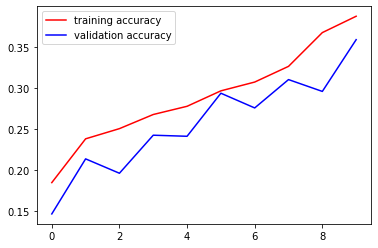

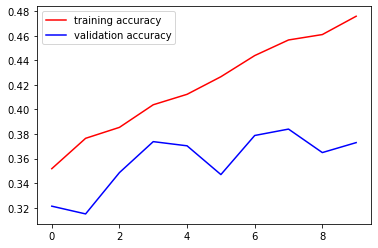

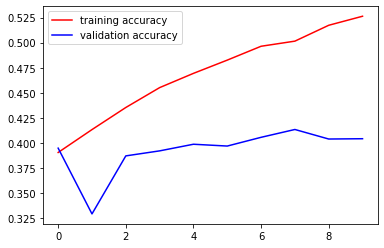

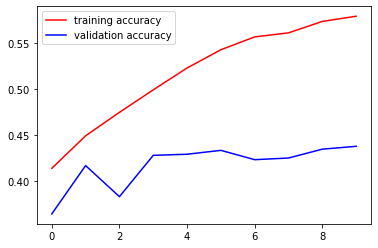

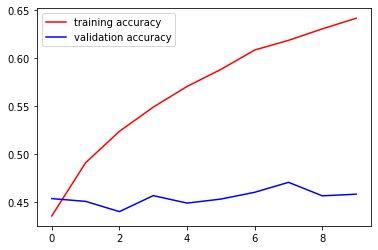

In [18]:
for i in range(len(history)):
    plt.plot(history[i].history['accuracy'],'r')
    plt.plot(history[i].history['val_accuracy'],'b')
    plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
    plt.show()

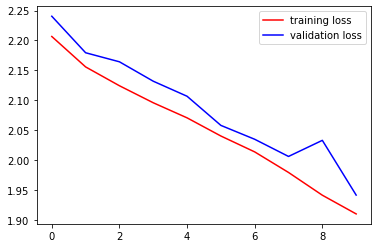

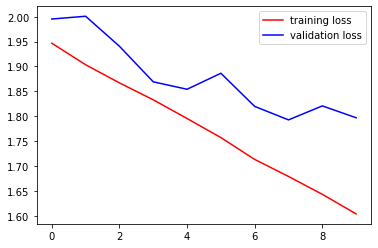

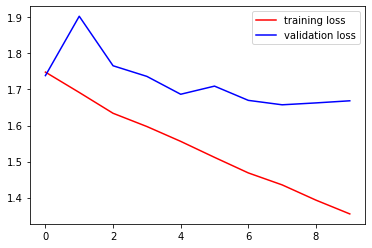

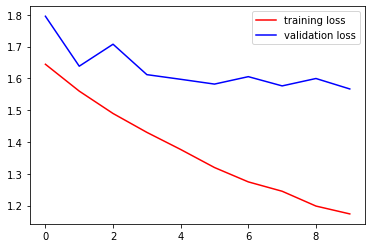

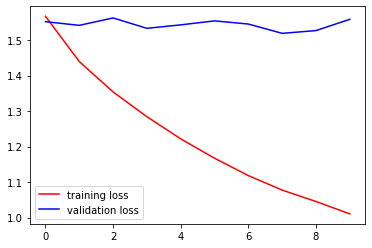

In [19]:
for i in range(len(history)):
    plt.plot(history[i].history['loss'],'r')
    plt.plot(history[i].history['val_loss'],'b')
    plt.legend({'training loss':'r', 'validation loss': 'b'})
    plt.show()

## Inference

In [20]:
predictions = model.predict_classes(X_test)

In [21]:
# we can also use a confusion matrix to visualize the performance of a classification model
cm = confusion_matrix(y_test, predictions)
# use this line to normalize the confusion matrix to show percentages instead of counts
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


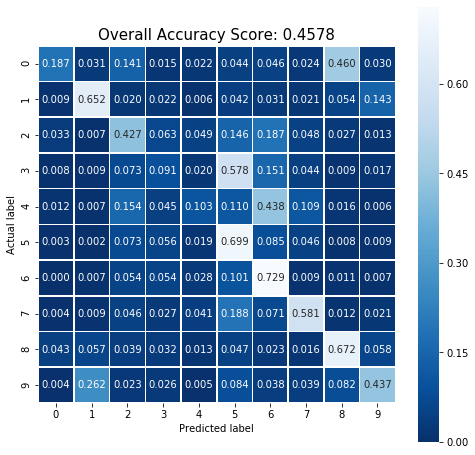

In [22]:
# plot this matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Overall Accuracy Score: {0:.4f}'.format(score[1])
plt.title(all_sample_title, size = 15);
# plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show();

In [23]:
# review and suggestions 13 Dec 2019
"""
argho : model seems to be overfitted to train data.
        maybe model learns all the noise in train data.
        try to lower the learning rate or check dataset
        if class is equally distributed.
        cf) for not equal dataset, e.g. cancer-noncancer,
        the model can learn non-cancer image more
        and predict that all patients not have cancer.
        One way to deal this problem is to equalize the percentage
        of each class. Another would be to increase penalty(class weights)
        for minority class.
"""

'\nargho : model seems to be overfitted to train data.\n        maybe model learns all the noise in train data.\n        try to lower the learning rate or check dataset\n        if class is equally distributed.\n        cf) for not equal dataset, e.g. cancer-noncancer,\n        the model can learn non-cancer image more\n        and predict that all patients not have cancer.\n        One way to deal this problem is to equalize the percentage\n        of each class. Another would be to increase penalty(class weights)\n        for minority class.\n\n'